![Crowded city](city-1265055_1280.jpg)

In the quest for efficiency and effectiveness in urban transportation, finding the optimal routes to take passengers from their initial locations to their desired destinations is paramount. This challenge is not just about reducing travel time; it's about enhancing the overall experience for both drivers and passengers, ensuring safety, and minimizing environmental impact. 

You have been asked to revolutionize the way taxis navigate the urban landscape, ensuring passengers reach their destinations swiftly, safely, and satisfactorily. As an initial step, your goal is to build a reinforcement learning agent that solves this problem within a simulated environment.

## The Taxi-v3 environment
The Taxi-v3 environment is a strategic simulation, offering a grid-based arena where a taxi navigates to address daily challenges akin to those faced by a taxi driver. This environment is defined by a 5x5 grid where the taxi's mission involves picking up a passenger from one of four specific locations (marked as Red, Green, Yellow, and Blue) and dropping them off at another designated spot. The goal is to accomplish this with minimal time on the road to maximize rewards, emphasizing the need for route optimization and efficient decision-making for passenger pickup and dropoff.

### Key Components:
- **Action Space:** Comprises six actions where 0 moves the taxi south, 1 north, 2 east, 3 west, 4 picks up a passenger, and 5 drops off a passenger.
- **Observation Space:** Comprises 500 discrete states, accounting for 25 taxi positions, 5 potential passenger locations, and 4 destinations. 
- **Rewards System:** Includes a penalty of -1 for each step taken without other rewards, +20 for successful passenger delivery, and -10 for illegal pickup or dropoff actions. Actions resulting in no operation, like hitting a wall, also incur a time step penalty.

![Taxi-v3 environment snapshot](Taxi_snap.png)


In [30]:
# Re-run this cell to install and import the necessary libraries and load the required variables
!pip install gymnasium[toy_text] imageio
import numpy as np
import gymnasium as gym
import imageio
from IPython.display import Image
from gymnasium.utils import seeding
import matplotlib.pyplot as plt

# Initialize the Taxi-v3 environment
env = gym.make("Taxi-v3", render_mode='rgb_array')

# Seed the environment for reproducibility
env.np_random, _ = seeding.np_random(42)
env.action_space.seed(42)
np.random.seed(42)

# Maximum number of actions per training episode
max_actions = 100 
num_episodes = 2000

# Frames
frames = []

# Alpha and Gamma
learning_rate = 0.9
gamma = 0.9
#Epsilon
epsilon = 1
epsilon_decay = 0.001
min_epsilon =0.01


Defaulting to user installation because normal site-packages is not writeable


In [31]:
num_states = env.observation_space.n
num_actions = env.action_space.n
print("\nNumber of States: ", num_states)
print("\nNumber of Actions: ", num_actions)
policy = {state: action for state in range(num_states) for action in range(num_actions)}
print(env.unwrapped.P[498])
#Q Table
q_table =np.zeros((num_states, num_actions))


Number of States:  500

Number of Actions:  6
{0: [(1.0, 498, -1, False)], 1: [(1.0, 398, -1, False)], 2: [(1.0, 498, -1, False)], 3: [(1.0, 478, -1, False)], 4: [(1.0, 498, -10, False)], 5: [(1.0, 498, -10, False)]}


In [32]:
def epsilon_greedy(state):
    if np.random.rand() <epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(q_table[state])

In [33]:
def update_q_table(state, action, reward, next_state):
    q_table[state, action] = (1 - learning_rate) * q_table[state, action] + learning_rate * (reward + gamma * np.max(q_table[next_state]))

episode_total_reward = 0
save_frequency = 100 
episode_returns = []

for i in range(num_episodes):
    terminated = False
    steps = 0
    state, info = env.reset(seed=42)
    total_reward = 0
    
    while (not terminated and steps <= max_actions):
        action = epsilon_greedy(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        steps += 1
        update_q_table(state, action, reward, next_state)
        state = next_state
        total_reward += reward
    
    episode_returns.append(total_reward)
    epsilon = max(min_epsilon, epsilon - epsilon_decay)
    
    if (i + 1) % 100 == 0:
        print(f"Episode {i+1}/{num_episodes}, Average reward: {np.mean(episode_returns[max(0, i-99):i+1]):.2f}")

print("Average reward per random episode: ", np.mean(episode_returns))
print("\nLearned Q table: \n", q_table)

policy = {}
for state in range(q_table.shape[0]):
    policy[state] = int(np.argmax(q_table[state]))

print("\nLearned policy: \n", policy)

frames = []
episode_total_reward = 0
state, info = env.reset(seed=42)
terminated = False
steps = 0

while not terminated and steps < 16:  
    action = policy[state]
    next_state, reward, terminated, truncated, info = env.step(action)
    frames.append(env.render())
    episode_total_reward += reward
    state = next_state
    steps += 1

print(f"\nTest episode reward: {episode_total_reward}")
print(f"Steps taken: {steps}")

Episode 100/2000, Average reward: -366.59
Episode 200/2000, Average reward: -289.00
Episode 300/2000, Average reward: -181.58
Episode 400/2000, Average reward: -116.43
Episode 500/2000, Average reward: -57.24
Episode 600/2000, Average reward: -38.30
Episode 700/2000, Average reward: -22.61
Episode 800/2000, Average reward: -9.79
Episode 900/2000, Average reward: -2.05
Episode 1000/2000, Average reward: 5.32
Episode 1100/2000, Average reward: 7.40
Episode 1200/2000, Average reward: 7.80
Episode 1300/2000, Average reward: 7.45
Episode 1400/2000, Average reward: 7.62
Episode 1500/2000, Average reward: 7.54
Episode 1600/2000, Average reward: 7.51
Episode 1700/2000, Average reward: 7.37
Episode 1800/2000, Average reward: 7.62
Episode 1900/2000, Average reward: 7.44
Episode 2000/2000, Average reward: 7.31
Average reward per random episode:  -50.1605

Learned Q table: 
 [[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        

In [34]:
# policy = {state:np.argmax(q_table[state] for state in range(num_states))}

In [35]:
# frames = []
# state, info = env.reset(seed=42)
# frames.append(env.render())
# episode_total_reward = 0
# for i in range(16): # Execute maximum 16 moves
#     if state in policy:
#         action = policy[state]
#     else:
#         action = env.action_space.sample()  # Sample a random action if state is not in policy
#     state, reward, terminated, truncated, info = env.step(action)
#     episode_total_reward += reward
#     frames.append(env.render())
#     if terminated:
#         break

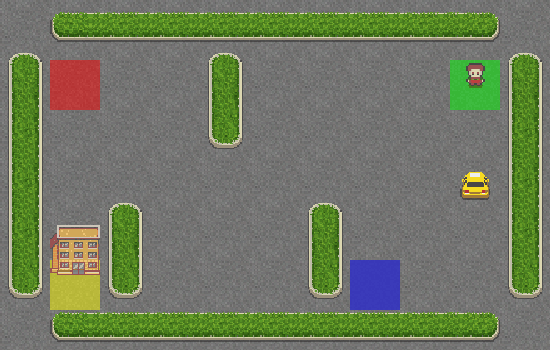

In [36]:
# Once you are done, run this cell to visualize the agent's behavior through the episode
# Save frames as a GIF
import imageio
from IPython.display import Image, display

# Reduce the number of frames to avoid large output
reduced_frames = frames[::2]  # Take every 10th frame to reduce size

imageio.mimsave('taxi_agent_behavior.gif', reduced_frames, fps=5)

# Display GIF
gif_path = "taxi_agent_behavior.gif" 
display(Image(filename=gif_path))